# Poincare Boundary Condition

Most of the tutorials use last closed flux surface (LCFS) as the boundary condition for 3D equilibrium. This tutorial will cover another way to define boundary condition using DESC.

In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../../"))

Import required stuff.

In [2]:
from desc.objectives import (
    ObjectiveFunction,
    ForceBalance
)
from desc.basis import ZernikePolynomial, FourierZernikeBasis,FourierZernike_to_FourierZernike_no_N_modes,FourierZernike_to_PoincareZernikePolynomial
from desc.transform import Transform
from desc.equilibrium import EquilibriaFamily, Equilibrium
from desc.plotting import plot_1d,plot_2d,plot_3d,plot_comparison, plot_section, plot_fsa, plot_surfaces
from desc.optimize import Optimizer
from desc.perturbations import perturb,optimal_perturb
import numpy as np
from desc.geometry import ZernikeRZToroidalSection, PoincareSurface
%matplotlib inline
from desc.utils import copy_coeffs
import matplotlib.pyplot as plt
from desc.examples import get
from desc.objectives.getters import get_fixed_boundary_constraints
from desc.grid import LinearGrid
from desc.optimize._constraint_wrappers import ProximalProjection
import plotly.graph_objects as go

DESC version 0.10.3+347.gc910feda.dirty,using JAX backend, jax version=0.4.14, jaxlib version=0.4.14, dtype=float64
Using device: CPU, with 10.41 GB available memory


### Solving Poincare Boundary Condition from an existing equilibrium

To first show that Poincare BC gives the same result with LCFS, let's set our optimization problem by taking the $\zeta$=0 Poincare cross-section of Heliotron equilibrium.

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 142 ms
Timer: Objective build = 359 ms
Timer: Linear constraint projection build = 1.44 sec
Compiling objective function and derivatives: ['force']
Timer: Objective compilation time = 1.28 sec
Timer: Jacobian compilation time = 3.77 sec
Timer: Total compilation time = 5.06 sec
Number of parameters: 1521
Number of objectives: 4940
Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          1.216e+00                                    8.230e+01   
       1              5          5.212e-01      6.948e-01      4.909e-02      2.132e+01   
       2              6          1.250e-01      3.963e-01      1.049e-01      1.691e+01   
       3              8          6.337e-02      6.159e-02      5.672e-02      4.152e+00   
       4              9          2.266e-02      4.071e-02      1.075e-01      2.115e

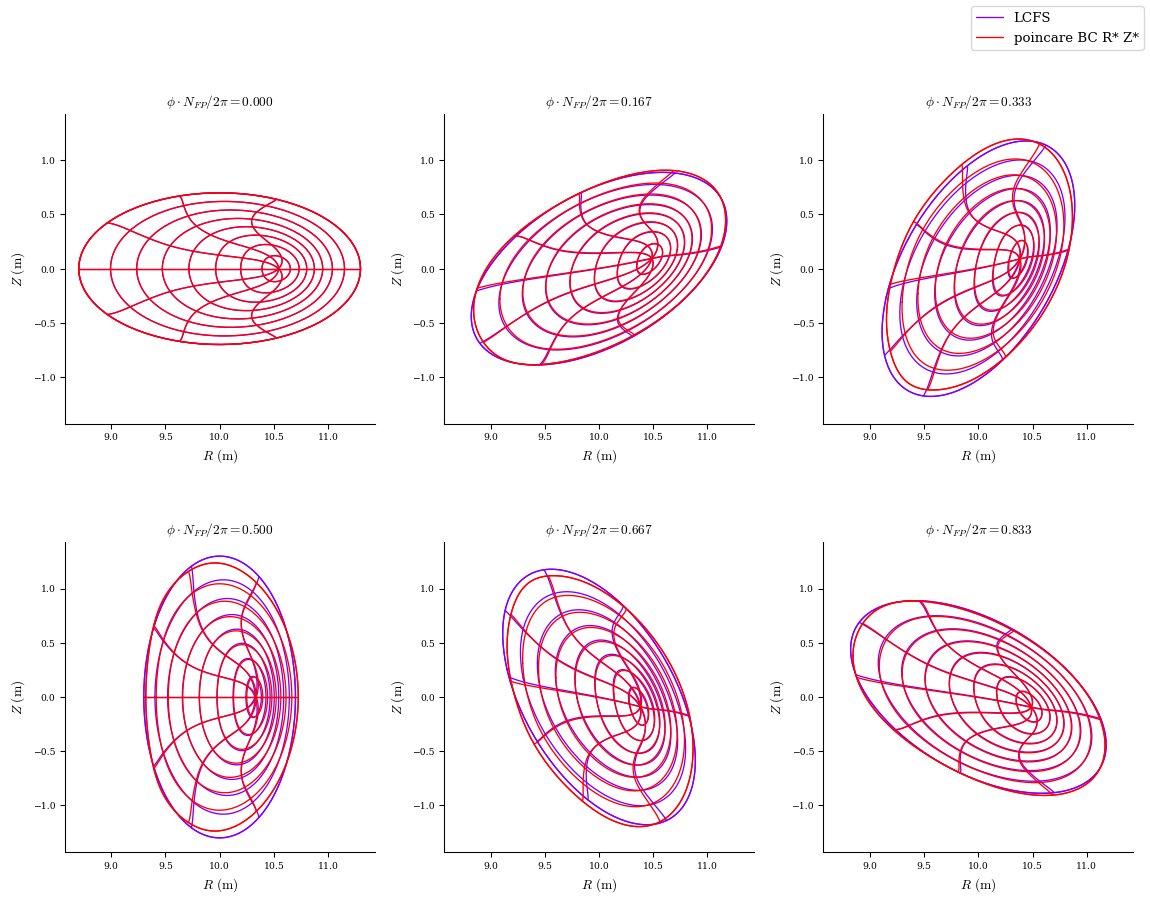

In [ ]:
eq = get("HELIOTRON")
zeta = 0
eq_poin = eq.set_poincare_equilibrium(zeta=zeta)

eq_poin.change_resolution(eq_poin.L,eq_poin.M,eq.N) 
eq_poin.N_grid=eq.N_grid
constraints = get_fixed_boundary_constraints(eq=eq_poin)
objective = ObjectiveFunction(ForceBalance(eq_poin))
optimizer = Optimizer("lsq-exact")

eq_poin.solve(verbose=3, ftol=0, objective=objective, constraints=constraints, optimizer=optimizer,maxiter=200, xtol=0)
plot_comparison(eqs=[eq,eq_poin],labels=['LCFS',f'Poincare BC']);

### Creating a new Poincare surface to fix 

We can also create a new surface object calle "PoincareSurface" to set our optimizzation problem as LCFS.